# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![](data/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad

In [3]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from sklearn.datasets import make_moons

In [8]:
moons[0][:,0]

array([ 0.41611155,  1.36351611, -0.27014402,  1.57142709, -0.15475712,
       -0.87418967,  0.79003921,  1.9350408 ,  1.35262811,  1.65339029,
        1.08383989,  0.62351942,  1.15950122,  0.06061109, -0.50058551,
        0.80470397,  0.32121984,  1.96963893,  0.94886905, -0.84766737,
        0.2398995 ,  1.80096971, -0.63292107,  0.90686228,  0.10111242,
       -0.1493862 ,  2.04237749, -0.7489032 ,  0.8287909 ,  0.95572942,
       -0.3718652 ,  0.58028032,  0.1223659 ,  0.25625556,  1.82095755,
        0.51216591, -0.9192435 ,  0.83512748,  1.62521706, -0.02948263,
        0.94720311, -0.00973159,  0.01193963,  0.67748645, -0.55115323,
       -0.8232294 , -0.41225841,  1.73390031,  0.97627925, -0.9455107 ,
       -0.50993807,  1.039167  ,  1.96314825,  0.90412583,  1.76425956,
        0.91346173,  1.95911673,  0.98483877,  1.03357933,  1.20697168,
       -0.05690776,  0.95370252,  0.46579561,  0.95799801, -0.74323439,
        0.41638234,  0.03739523,  0.8568398 ,  1.04480871,  0.13

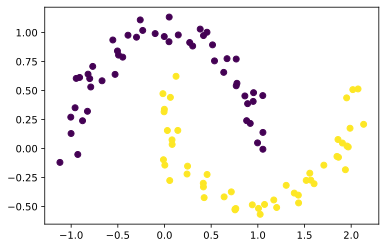

In [73]:
moons = make_moons(n_samples = 100 , shuffle = True, noise = 0.08) #data sintetica de moons
plt.scatter(moons[0][:,0], moons[0][:,1], c= moons[1]) #se usa target original

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sample

In [76]:
dbscan = DBSCAN(eps = 0.3, min_samples=4) #27 optimo

In [77]:
dbscan.fit(moons[0])

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [78]:
dbscan.labels_

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

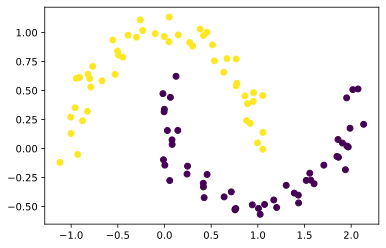

In [79]:
plt.scatter(moons[0][:,0], moons[0][:,1], c= dbscan.labels_)

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [82]:
from hdbscan import HDBSCAN

In [85]:
hdbscan = HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)

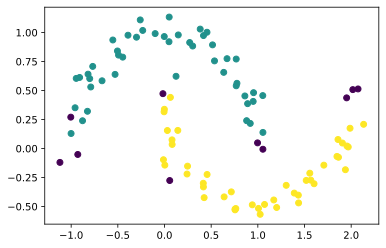

In [86]:
hdbscan.fit(moons[0])
plt.scatter(moons[0][:,0],moons[0][:,1], c = hdbscan.labels_)

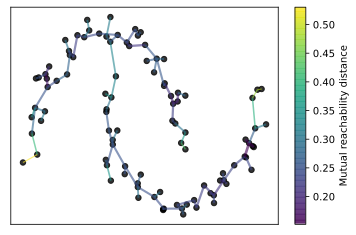

In [87]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap = 'viridis',
                                   edge_alpha = 0.6,
                                   node_size = 30,
                                   edge_linewidth=1.2);

<AxesSubplot:ylabel='distance'>

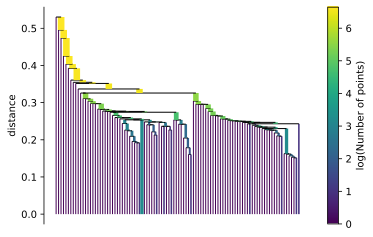

In [89]:
hdbscan.single_linkage_tree_.plot(cmap = 'viridis',
                                 colorbar = True)

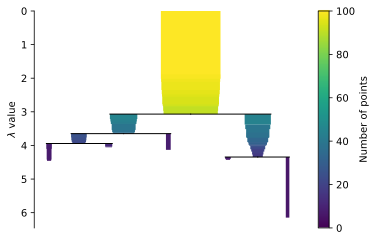

In [90]:
hdbscan.condensed_tree_.plot();

In [92]:
import seaborn as sns

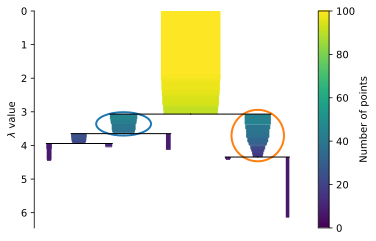

In [93]:
hdbscan.condensed_tree_.plot(select_clusters=True,
                            selection_palette=sns.color_palette());

In [94]:
hdbscan.labels_

array([-1,  1,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,
        1,  1,  1,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  1, -1,  0,
       -1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0,  0,  1,
        1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0, -1,  0,  1,  1,  0,  1,
        1,  1,  0, -1,  0,  1,  0,  0, -1,  0, -1,  0,  1,  0,  1, -1,  0,
        0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  1,  0,  1,  0,  1],
      dtype=int64)

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![](data/optics.png)

In [95]:
from sklearn.cluster import OPTICS

In [96]:
help(OPTICS)

Help on class OPTICS in module sklearn.cluster._optics:

class OPTICS(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  OPTICS(min_samples=5, max_eps=inf, metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, n_jobs=None)
 |  
 |  Estimate clustering structure from vector array.
 |  
 |  OPTICS (Ordering Points To Identify the Clustering Structure), closely
 |  related to DBSCAN, finds core sample of high density and expands clusters
 |  from them [1]_. Unlike DBSCAN, keeps cluster hierarchy for a variable
 |  neighborhood radius. Better suited for usage on large datasets than the
 |  current sklearn implementation of DBSCAN.
 |  
 |  Clusters are then extracted using a DBSCAN-like method
 |  (cluster_method = 'dbscan') or an automatic
 |  technique proposed in [1]_ (cluster_method = 'xi').
 |  
 |  This implementation deviates from the original OPTICS by first pe

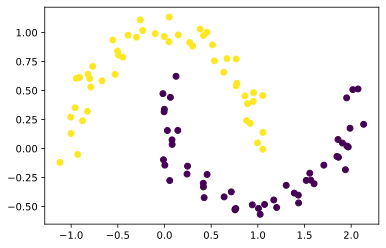

In [101]:
opt = OPTICS(eps = 0.7, metric = 'euclidean', min_cluster_size=0.5)
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c = opt.labels_)

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![](data/gmm.png)


![](data/gmm2.png)

In [102]:
from sklearn.mixture import GaussianMixture as GM

In [103]:
help(GM)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, defaults to 1.
 |      The number of mixture components.
 |  
 |  covariance_type : {'full' (default), 'tied', 'diag', 'spherical'}
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      'full'
 |          each component

In [106]:
gm = GM(n_components=2, covariance_type='full')
gm.fit(moons[0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

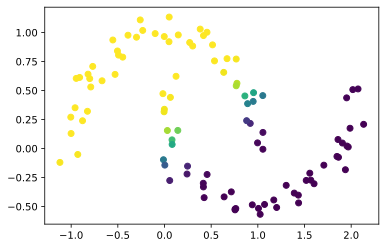

In [111]:
plt.scatter(moons[0][:,0], moons[0][:,1], c = gm.predict_proba(moons[0])[:,1])

In [112]:
gm.predict_proba(moons[0])[:,1]

array([5.19541290e-03, 4.24432509e-03, 5.41772699e-05, 9.99996039e-01,
       1.01016575e-04, 9.99994641e-01, 1.23320774e-04, 1.65793879e-03,
       9.99994981e-01, 4.01295502e-01, 9.99992526e-01, 9.99987866e-01,
       2.22483983e-04, 8.91289581e-01, 1.16977730e-04, 2.57404715e-04,
       1.31466053e-02, 1.64306291e-03, 9.87736325e-03, 9.89759742e-01,
       9.99952125e-01, 9.99795782e-01, 9.99943204e-01, 4.36858052e-05,
       9.97893214e-01, 8.32022701e-05, 9.99989654e-01, 9.89408235e-01,
       8.72855911e-01, 9.99990628e-01, 9.99949956e-01, 1.62992904e-04,
       9.91674772e-01, 9.99974655e-01, 7.13800057e-03, 8.63593515e-01,
       1.06752774e-04, 9.99989098e-01, 9.99998799e-01, 9.99983106e-01,
       1.15574659e-01, 3.86950713e-04, 3.07529171e-02, 1.02938054e-01,
       6.37481435e-01, 9.95112056e-01, 9.92371477e-01, 9.99859290e-01,
       9.99618190e-01, 9.99944785e-01, 6.91307164e-01, 3.98383012e-04,
       9.99071108e-01, 9.99988824e-01, 9.74472049e-01, 9.99898585e-01,
      

In [114]:
from sklearn.datasets import make_classification as mc #data sintetica

In [115]:
x = mc(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
x

(array([[-0.27741923,  0.33023247],
        [ 0.14757541, -1.00584342],
        [-1.09412935,  1.40488644],
        [ 0.47193089, -0.99715918],
        [-1.60318072, -1.1765823 ],
        [-2.07982787, -1.14126863],
        [-0.20601194,  0.20098256],
        [-1.5739358 ,  1.76673869],
        [-1.94413647, -1.2953619 ],
        [-1.63818049, -1.38258841],
        [-2.49324088,  2.58598909],
        [-0.4356409 ,  0.54498352],
        [-0.83706172, -1.48368927],
        [ 0.59591603, -1.16566183],
        [-2.25964845,  1.42183624],
        [-1.00745847, -1.40889941],
        [-0.80638886, -1.11619884],
        [-0.76457485, -1.22599688],
        [-0.61180955, -0.92867566],
        [-1.50869578,  2.44088733],
        [-0.06330152,  1.03118939],
        [-2.17442179, -1.14449675],
        [-2.14890945, -1.02148185],
        [-0.07983002,  0.08766477],
        [ 1.95658938, -0.79788842],
        [ 0.89868581,  0.48064013],
        [-0.23062623, -1.21501339],
        [-1.31173136, -0.824

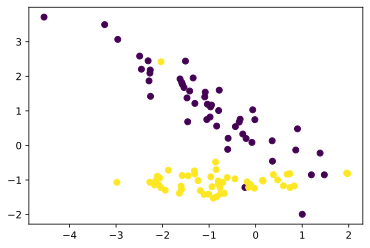

In [117]:
plt.scatter(x[0][:,0],x[0][:,1], c = x[1])

In [118]:
gm = GM(n_components=2, covariance_type='full')
gm.fit(x[0])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

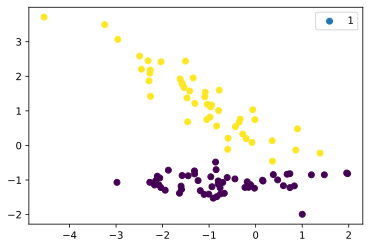

In [123]:
plt.scatter(x[0][:,0],x[0][:,1], c = gm.predict(x[0]));
plt.legend(gm.predict(x[0]))

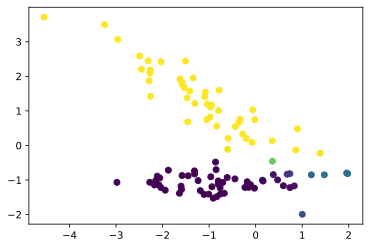

In [120]:
plt.scatter(x[0][:,0],x[0][:,1], c = gm.predict_proba(x[0])[:,1]);

![](data/usl_models.png)

In [124]:
from sklearn.datasets import make_blobs

In [125]:
from numpy import random, where


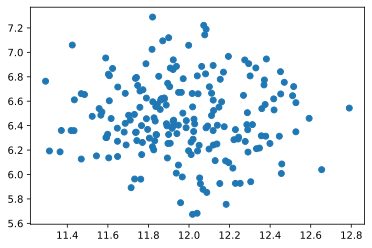

In [126]:
x = make_blobs(n_samples=200, centers = 1, cluster_std=.3, center_box=(20,5))
plt.scatter(x[0][:,0],x[0][:,1])
plt.show();

In [127]:
dbscan = DBSCAN(eps = 0.25, min_samples = 15)
pred = dbscan.fit_predict(x[0])
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [128]:
anom_index = where(pred == -1) #el indice de los valores de pred que sean -1
values = x[0][anom_index]
values

array([[12.65402913,  6.03938856],
       [11.29277185,  6.76368051],
       [11.42460226,  7.05983072],
       [11.71462627,  5.89202371],
       [12.79027449,  6.54366908],
       [11.82032908,  7.28906752]])

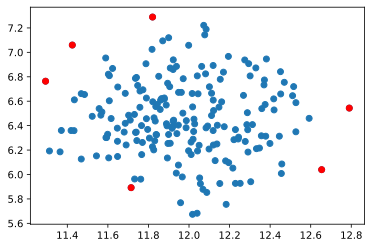

In [129]:
plt.scatter(x[0][:,0],x[0][:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show();

In [131]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
import numpy as np

In [132]:
breadbasket = pd.read_csv('data/breadbasket_dms.csv')

In [133]:
breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [134]:
breadbasket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [135]:
breadbasket.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [136]:
breadbasket['Date'] = pd.to_datetime(breadbasket['Date']+' '+breadbasket['Time'],
                                     format = '%Y-%m-%d %H:%M:%S')

In [138]:
breadbasket.dtypes

Date           datetime64[ns]
Time                   object
Transaction             int64
Item                   object
dtype: object

In [143]:
breadbasket['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [145]:
len(breadbasket['Item'].unique())

95

In [140]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']


In [146]:
food = beverage+other+kids+snacks+bread+breakfast_pastry+dessert+breakfast+lunch
len(food)

64

In [147]:
other_food = [e for e in breadbasket['Item'].unique() if e not in food]

In [148]:
food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']


In [152]:
for i in range(len(food_names)):
    breadbasket[food_names[i]] = np.where(breadbasket['Item'].isin(food_list[i]),1,0)

In [153]:
breadbasket

,Date,Time,Transaction,Item,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
0,2016-10-30 09:58:11,09:58:11,1,Bread,0,0,0,0,1,0,0,0,0,0
1,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0
3,2016-10-30 10:07:57,10:07:57,3,Hot chocolate,1,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:07:57,10:07:57,3,Jam,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09 14:32:58,14:32:58,9682,Coffee,1,0,0,0,0,0,0,0,0,0
21289,2017-04-09 14:32:58,14:32:58,9682,Tea,1,0,0,0,0,0,0,0,0,0
21290,2017-04-09 14:57:06,14:57:06,9683,Coffee,1,0,0,0,0,0,0,0,0,0
21291,2017-04-09 14:57:06,14:57:06,9683,Pastry,0,0,0,0,0,1,0,0,0,0


In [154]:
bread_group = breadbasket.groupby(['Date','Transaction']).sum()
bread_group

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Date,Transaction,,,,,,,,,,
2016-10-30 09:58:11,1,0,0,0,0,1,0,0,0,0,0
2016-10-30 10:05:34,2,0,0,0,0,2,0,0,0,0,0
2016-10-30 10:07:57,3,1,0,0,0,0,0,1,1,0,0
2016-10-30 10:08:41,4,0,0,0,0,0,1,0,0,0,0
2016-10-30 10:13:03,5,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-04-09 14:24:03,9680,0,0,0,0,1,0,0,0,0,0
2017-04-09 14:30:09,9681,1,1,0,0,0,0,1,0,0,0
2017-04-09 14:32:58,9682,2,0,0,0,0,1,0,0,0,0


In [155]:
bread_group.sum(axis = 1)

Date                 Transaction
2016-10-30 09:58:11  1              1
2016-10-30 10:05:34  2              2
2016-10-30 10:07:57  3              3
2016-10-30 10:08:41  4              1
2016-10-30 10:13:03  5              3
                                   ..
2017-04-09 14:24:03  9680           1
2017-04-09 14:30:09  9681           3
2017-04-09 14:32:58  9682           3
2017-04-09 14:57:06  9683           2
2017-04-09 15:04:24  9684           1
Length: 9531, dtype: int64

In [157]:
bread_group.reset_index(level= 'Date', inplace = True)
bread_group.head()

,Date,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Transaction,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0


In [158]:
bread_group['Day'] = bread_group['Date'].dt.day_name()
bread_group

,Date,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Day
Transaction,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,1,0,0,0,0,0,Sunday
9681,2017-04-09 14:30:09,1,1,0,0,0,0,1,0,0,0,Sunday
9682,2017-04-09 14:32:58,2,0,0,0,0,1,0,0,0,0,Sunday


In [159]:
bread_group['Hour'] = bread_group['Date'].dt.hour
bread_group['Month'] = bread_group['Date'].dt.month

In [160]:
bread_group

,Date,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Day,Hour,Month
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,1,0,0,0,0,0,Sunday,14,4
9681,2017-04-09 14:30:09,1,1,0,0,0,0,1,0,0,0,Sunday,14,4
9682,2017-04-09 14:32:58,2,0,0,0,0,1,0,0,0,0,Sunday,14,4


<AxesSubplot:>

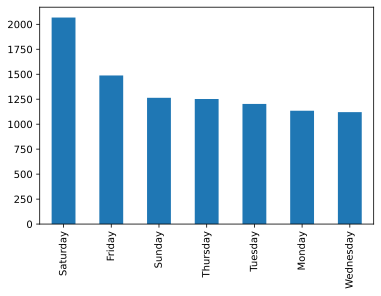

In [164]:
bread_group['Day'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

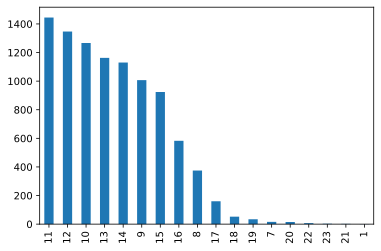

In [165]:
bread_group['Hour'].value_counts().plot(kind = 'bar')

In [167]:
bread_dummy = pd.get_dummies(bread_group, columns = ['Day']).drop('Date',axis = 1)
bread_dummy

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Hour,Month,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,9,10,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,10,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,10,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,10,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,10,10,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,14,4,0,0,0,1,0,0,0
9681,1,1,0,0,0,0,1,0,0,0,14,4,0,0,0,1,0,0,0
9682,2,0,0,0,0,1,0,0,0,0,14,4,0,0,0,1,0,0,0


In [168]:
from sklearn.decomposition import PCA

In [169]:
bread_dummy.isna().sum()

beverage            0
other               0
kids                0
snacks              0
bread               0
breakfast_pastry    0
dessert             0
condiments          0
breakfast           0
lunch               0
Hour                0
Month               0
Day_Friday          0
Day_Monday          0
Day_Saturday        0
Day_Sunday          0
Day_Thursday        0
Day_Tuesday         0
Day_Wednesday       0
dtype: int64

In [170]:
bread_dummy.dtypes

beverage            int32
other               int32
kids                int32
snacks              int32
bread               int32
breakfast_pastry    int32
dessert             int32
condiments          int32
breakfast           int32
lunch               int32
Hour                int64
Month               int64
Day_Friday          uint8
Day_Monday          uint8
Day_Saturday        uint8
Day_Sunday          uint8
Day_Thursday        uint8
Day_Tuesday         uint8
Day_Wednesday       uint8
dtype: object

In [171]:
for i in bread_dummy.columns[-9:]:
    bread_dummy[i] = bread_dummy.astype('int32')

In [172]:
bread_dummy.dtypes

beverage            int32
other               int32
kids                int32
snacks              int32
bread               int32
breakfast_pastry    int32
dessert             int32
condiments          int32
breakfast           int32
lunch               int32
Hour                int32
Month               int32
Day_Friday          int32
Day_Monday          int32
Day_Saturday        int32
Day_Sunday          int32
Day_Thursday        int32
Day_Tuesday         int32
Day_Wednesday       int32
dtype: object

In [173]:
bread_dummy.fillna(0, inplace = True)

In [174]:
pca = PCA(n_components=2).fit_transform(bread_dummy)
pca

array([[-2.78695145, -0.43172341],
       [-2.85240405, -1.23746511],
       [ 0.46218491,  0.73661051],
       ...,
       [ 3.59793967, -0.11257886],
       [ 0.44529475,  0.11884388],
       [ 0.43114607,  0.14259554]])

In [175]:
df_pca = pd.DataFrame(pca, columns = ['col1','col2'])

In [177]:
df_pca

,col1,col2
0,-2.786951,-0.431723
1,-2.852404,-1.237465
2,0.462185,0.736611
3,-2.707350,0.350267
4,0.379842,-0.686898
...,...,...
9526,-2.786951,-0.431723
9527,0.472526,0.727154
9528,3.597940,-0.112579
9529,0.445295,0.118844


<AxesSubplot:xlabel='col1', ylabel='col2'>

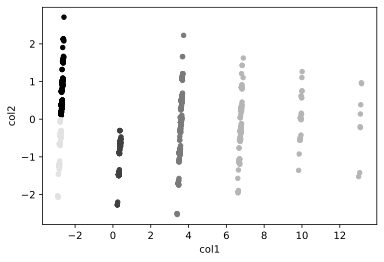

In [184]:
df_pca.plot.scatter(x= 'col1',y = 'col2')

In [180]:
from sklearn.cluster import KMeans

In [181]:
kmeans = KMeans(n_clusters=6).fit(df_pca)

In [182]:
kmeans.labels_

array([1, 1, 0, ..., 3, 0, 0])

In [183]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5}

In [186]:
bread_group['cluster'] = kmeans.labels_
bread_group.head()

,Date,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Day,Hour,Month,cluster
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10,1
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10,1
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10,5
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10,4


In [188]:
cm = sns.light_palette('blue', as_cmap = True)

In [189]:
pd.crosstab(bread_group['Hour'], bread_group['cluster']).style.background_gradient(cmap= cm)

cluster,0,1,2,3,4,5
Hour,,,,,,
1,0,1,0,0,0,0
7,9,1,0,1,2,3
8,125,128,4,26,47,45
9,350,274,25,129,105,124
10,413,315,36,228,122,153
11,450,323,58,275,129,210
12,398,295,45,222,123,264
13,410,196,33,197,77,250
14,392,182,46,211,80,219


In [192]:
pd.crosstab(bread_group['cluster'], [bread_group['Day'],bread_group['Hour']]).style.background_gradient(cmap= cm)

In [193]:
bread_group.groupby('cluster').sum()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Hour,Month
cluster,,,,,,,,,,,,
0,3156,279,15,13,194,623,952,39,41,471,38426,19911
1,0,80,7,1,2241,307,46,33,19,80,23057,12166
2,1020,64,1,8,89,110,220,8,10,106,4061,1647
3,3290,201,11,18,443,506,691,33,32,335,20410,9530
4,797,87,1,1,904,186,33,19,25,102,9305,4657
5,0,201,12,8,255,437,859,88,33,242,20640,10087


In [194]:
pd.crosstab(bread_group['Day'], bread_group['cluster']).style.background_gradient(cmap= cm)

cluster,0,1,2,3,4,5
Day,,,,,,
Friday,516,308,53,213,138,260
Monday,418,201,21,213,95,187
Saturday,587,504,85,352,156,384
Sunday,357,251,65,268,114,209
Thursday,429,243,43,189,116,232
Tuesday,471,230,24,201,86,191
Wednesday,378,247,32,209,92,163


In [196]:
bread_group

,Date,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,Day,Hour,Month,cluster
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10,1
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10,1
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10,5
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,1,0,0,0,0,0,Sunday,14,4,1
9681,2017-04-09 14:30:09,1,1,0,0,0,0,1,0,0,0,Sunday,14,4,0
9682,2017-04-09 14:32:58,2,0,0,0,0,1,0,0,0,0,Sunday,14,4,3


In [195]:
breadbasket

,Date,Time,Transaction,Item,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
0,2016-10-30 09:58:11,09:58:11,1,Bread,0,0,0,0,1,0,0,0,0,0
1,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0
3,2016-10-30 10:07:57,10:07:57,3,Hot chocolate,1,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:07:57,10:07:57,3,Jam,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09 14:32:58,14:32:58,9682,Coffee,1,0,0,0,0,0,0,0,0,0
21289,2017-04-09 14:32:58,14:32:58,9682,Tea,1,0,0,0,0,0,0,0,0,0
21290,2017-04-09 14:57:06,14:57:06,9683,Coffee,1,0,0,0,0,0,0,0,0,0
21291,2017-04-09 14:57:06,14:57:06,9683,Pastry,0,0,0,0,0,1,0,0,0,0


In [199]:
bread_group.reset_index()[['cluster','Transaction']]

,cluster,Transaction
0,1,1
1,1,2
2,0,3
3,5,4
4,4,5
...,...,...
9526,1,9680
9527,0,9681
9528,3,9682
9529,0,9683


In [201]:
bread_merge = breadbasket.merge(bread_group.reset_index()[['cluster','Transaction']], on = 'Transaction', how = 'left')

In [202]:
bread_merge

,Date,Time,Transaction,Item,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,cluster
0,2016-10-30 09:58:11,09:58:11,1,Bread,0,0,0,0,1,0,0,0,0,0,1
1,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0,1
2,2016-10-30 10:05:34,10:05:34,2,Scandinavian,0,0,0,0,1,0,0,0,0,0,1
3,2016-10-30 10:07:57,10:07:57,3,Hot chocolate,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:07:57,10:07:57,3,Jam,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21288,2017-04-09 14:32:58,14:32:58,9682,Coffee,1,0,0,0,0,0,0,0,0,0,3
21289,2017-04-09 14:32:58,14:32:58,9682,Tea,1,0,0,0,0,0,0,0,0,0,3
21290,2017-04-09 14:57:06,14:57:06,9683,Coffee,1,0,0,0,0,0,0,0,0,0,0
21291,2017-04-09 14:57:06,14:57:06,9683,Pastry,0,0,0,0,0,1,0,0,0,0,0


In [204]:
pd.DataFrame(bread_merge.groupby('cluster')['Item'].value_counts().to_frame('Counts').reset_index()\
            .set_index('Item').groupby('cluster')['Counts'].nlargest())

Counts
cluster Item                 
0       Coffee           2226
        Tea               551
        Cake              355
        Sandwich          272
        NONE              267
1       Bread            1854
        Scandinavian      204
        Pastry            151
        Baguette          106
        Medialuna          83
2       Coffee            586
        Tea               140
        Hot chocolate     108
        Juice             105
        Cake               82
3       Coffee           2077
        Tea               605
        Bread             307
        Hot chocolate     304
        Cake              293
4       Bread             720
        Coffee            582
        Tea               139
        Toast             134
        Pastry             86
5       Cake              273
        Farm House        255
        Bread             210
        Pastry            160
        Cookies           155

In [208]:
pd.DataFrame(bread_merge.groupby('cluster')['Item'].value_counts().to_frame('Counts'))

Counts
cluster Item                    
0       Coffee              2226
        Tea                  551
        Cake                 355
        Sandwich             272
        NONE                 267
...                          ...
5       Honey                  1
        Keeping It Local       1
        Nomad bag              1
        Spread                 1
        Tacos/Fajita           1

[383 rows x 1 columns]